<a href="https://colab.research.google.com/github/palakkapahi15/Mini-Project/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data : Images 


In [ ]:
!pip install bing_image_downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("watches",limit=20,output_dir='images', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://www.soletopia.com/wp-content/uploads/2013/05/refurbished-black-rolex-watch-limited-edition-6.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://dearlinnea.files.wordpress.com/2011/07/mens-ring.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.simoncarter.net/Images/SuperZoom/ae871576-8303-47f8-a794-876270cb5e43.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.bach-cantatas.com/Pic-Memo-BIG/1208-20.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.bobswatches.com/images/z104035-c.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://img0.etsystatic.com/035/1/8755720/il_750xN.565785060_k6q8.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://cdn1.hautetime.com/wp-content/uploads/2012/06/sofia-vergara-435-e1340310567616.jpg
[%] File Downloaded !

[%] Downloading Image #8 from https://miro.medium.com/

In [ ]:
from bing_image_downloader import downloader
downloader.download("clocks",limit=20,output_dir='images', adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/736x/7b/32/7f/7b327f680d89e56b437a28fc97f5dd32--vintage-clocks-antique-clocks.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.fantasiescometrue.com/images/medium/fct_9c11ed2b298e089.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.digsdigs.com/photos/time-as-art-unique-modern-clocks-24-554x831.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://decorobject.com/wp-content/uploads/2017/12/decorative-bottles-wine-bottle-crafts.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://weneedfun.com/wp-content/uploads/2016/07/Clock-Wallpapers-41.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.toygarden.net/media/catalog/product/cache/1/image/446x/040ec09b1e35df139433887a97daa66f/p/d/pd1339135399puo.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://cdn.shopify.com/s/files/1/0178/7345/produc

In [ ]:
# Preprocessing
import os
import matplotlib.pyplot as plt 
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['watches','clocks']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)    


In [ ]:
flat_data[0]

array([0.86117647, 0.86352941, 0.87058824, ..., 0.902     , 0.8408    ,
       0.8204    ])

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<BarContainer object of 2 artists>

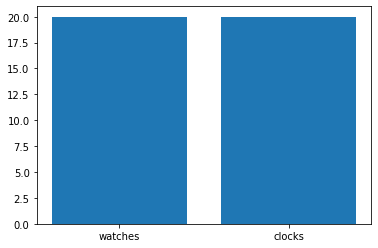

In [ ]:
unique,count = np.unique(target,return_counts = True)
plt.bar(CATEGORIES,count)

In [ ]:
# Slpit data into Training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data,target,test_size = 0.3, random_state = 105)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C' : [1,10,100,1000],'kernel' : ['linear']},
              {'C' : [1,10,100,1000], 'gamma' : [0,.001,.0001], 'kernel' :['rbf']}
]

svc = svm.SVC(probability = True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
y_test

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.75

In [ ]:
confusion_matrix(y_pred,y_test)

array([[6, 3],
       [0, 3]])

In [ ]:
# Save the model using Pickel library
import pickle 
pickle.dump(clf,open('imp_model.p','wb'))

In [ ]:
model = pickle.load(open('imp_model.p','rb'))

Enter your URLhttps://media2.picsearch.com/is?6uX-H0tFNljUVG5WuKMYSMwnUyoDVaGfeuDSiPCtoDI&height=341
(341, 341, 3)


ValueError: ignored

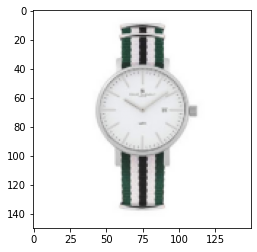

In [ ]:
# Testing a brand new Image
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT : {y_out}')